<a href="https://colab.research.google.com/github/s-ryuri/TIL/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B55%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import warnings
#ignore warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

plt.rc('font', family='NanumBarunGothic') 
def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

font_download_url = "https://fonts.google.com/download?family=Noto%20Sans%20KR"
change_matplotlib_font(font_download_url)

font family:  ['Noto Sans KR']


In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
                    ("scaler",StandardScaler()),
                    ("linear_svc",LinearSVC(C = 1,loss = "hinge"))
])
svm_clf.fit(x,y)
svm_clf.predict([[5.5,1.7]])

array([1.])

아이리스 데이터를 부른 뒤 x 데이터에서는 (2,3) 열만 가져오고 y는 target값이 2인 값만 가져옵니다. 파이프라인을 구성해서 스케일러와 C = 1이고 loss가 hinge인 SvM을 만듭니다. 그 후 fit을 이용해서 모델을 만들고 predict를 이용해서 class를  예측 해줍니다.

로지스틱 회귀와 다르게 SVM은 각각의 클래스에 대해서 한 instance가 속할 확률을 반환하지 않습니다. 어떤 클래스이지만 알려줍니다.

LinearSVC class는 편향을 정규화합니다. 그렇기에 데이터에 평균을 빼줘서 트레이닝 세트를 센터로 옮겨줘야됩니다. 이건 StandardScaler를 진행할 때 평균을 빼주기에 자동으로 됩니다.

hinge는 defalut가 아니기에 설정해줘야 합니다.

# Nonlinear SVM Classification

nonlinear한 데이터셋을 다루는 방법은 feature를 더해주는 방법이 있습니다. polynomial feature와 같이 . 이런 방법을 해도 어떤 경우는 linear하게 나눠진 데이터셋을 얻을 수 있습니다. 이 방법을 scikit-learn에서 하기 위해서는 Polynomial feature transformer를 포함하는 파이프라인을 구추갛면 됩니다.

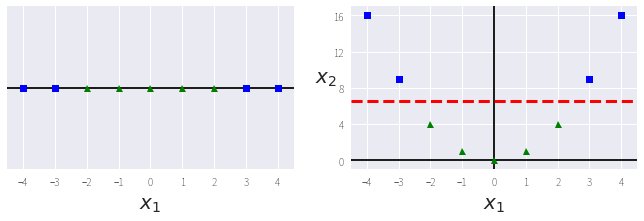

In [17]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

In [19]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

x,y = make_moons(n_samples = 100,noise = 0.15)
polynomial_svm_clf = Pipeline([
                               ("poly_features",PolynomialFeatures(degree = 3)),
                               ("scaler",StandardScaler()),
                               ("svm_clf",LinearSVC(C=10,loss = "hinge"))
])

polynomial_svm_clf.fit(x,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

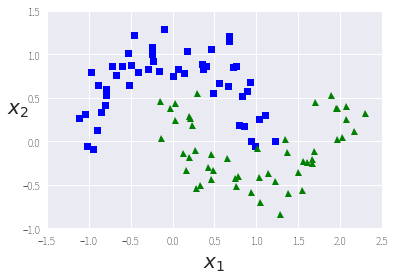

In [15]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

make_moons을 간단하게 그려보았습니다.

다항식 차수를 더해주는 방법에는 두 가지 이슈가 있습니다.
첫 번째로 낮은 다항식 차수를 더하면 복잡한 데이터셋을 다룰 수 가 없습니다.
두 번째로 높은 다항식 차수를 더하면 굉장히 많은 feature를 만들어내고 모델을 만드는데 굉장히 많은 시간이 소요됩니다.

다행히 SVM에는 Polynomial을 추가하지 않아도 실제로 추가한 것과 같은 효과를 내는 kernel trick을 제공해줍니다. 또한 다항식 차수를 더한 것과 똑같은 효과를 냅니다.

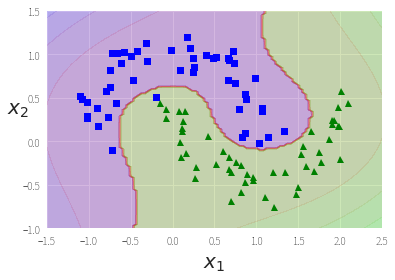

In [21]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

아래의 코드는 3차항 kernel을 이용해서 만든 SVM 분류기 입니다.
만일 overfitting이 된다면 차수를 줄이면 되고 과소적합된다면 차수를 올리면 됩니다.
coef0 매개변수는 높은 차수 vs 낮은 차수에 얼마나 영향을 받을지를 정합니다.
차수가 올라가면 복잡해지고 결국 overfittng 확률이 증가합니다.
실제 그래프에서는 coef0 == r 입니다.

In [24]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
                                ("scaler",StandardScaler()),
                                ("svm_clf",SVC(kernel = "poly",degree = 3,coef0 = 1, C = 5))
])
poly_kernel_svm_clf.fit(x,y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

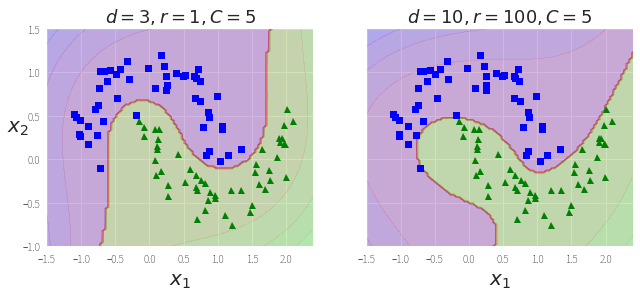

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

svm의 결정 경계를 그려보면 coef에 따라서 결정경계가 바뀌는걸 볼 수 있습니다 . coef == r이 커질수록 데이터 하나하나의 영향력이 커져서 결정경계가 복잡해지는 걸 볼 수 있습니다.

nonliear problem를 다루는 또 다른 방법은 similarit function을 이용해서 feature를 더하는 방법이다. 이 방법은 각각의 instance가 특정 랜드마크를 얼마나 닮았는지를 측정하는 방벙빕니다.

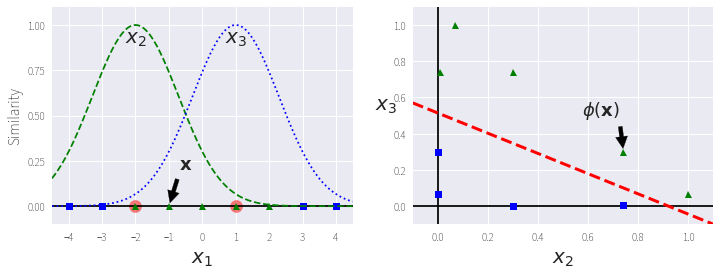

In [26]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

-2와 1을 랜드마크로 잡습니다. 그다음 RBF 가우시간 커널을 이용합니다. 그럼 0~1까지의 종 모양의 그래프가 그려집니다. 랜드마크를 기준으로 해서 그려집니다. 오른쪽 그래프는 original feature인 x1을 drop해서 그래프입니다. 딱 보기에도 선형적으로 나눠져 있습니다.

similarity feature는 polynomial features 방법과 같게 ML 알고리즘에 효과적이지만 모든 더해진 feature에 대해서 계산을 하는데 굉장히 오래 시간이 걸립니다.

SVM의 kernel을 이용해서 similarity feature를 더한 것과 같은 효과를 낼 수 있습니다.

In [27]:
rbf_kernel_svm_clf = Pipeline([
                               ("scaler",StandardScaler()),
                               ("svm_clf",SVC(kernel = "rbf",gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(x,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

위와 같이 kernel을 rbf로 설정하면 똑같은 효과를 얻을 수 있습니다.
RBF kernel에는 감마 하이퍼 파라미터가 존재합니다. 감마는 벨 shape의 curve 정도를 결정합니다. 즉 감마가 커지면 커브가 작아지기에 각각의 인스턴스 효과는 작아지고 decision boundary는 irregular 해집니다. 그렇기에 overfitting 확률이 증가합니다.
감마를 낮추는건 curve를 넓게 만듭니다. 즉 각각의 인스턴스들이 넓은 영향을 받고 결국 결정경계는 스무스해지기에 과소적합 가능성이 있습니다.

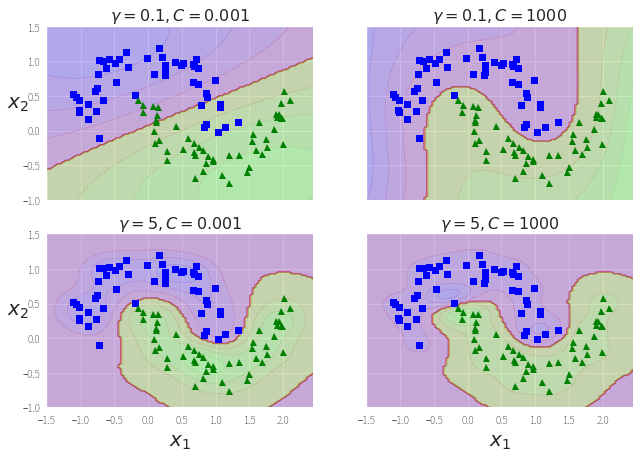

In [30]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(x, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(x, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

위의 그래프만 봐도 알 수 있습니다. 위에서 아래로는 감마의 영향을 왼쪽에서 오른쪽으로 C 규제 매개변수를의 옇양을 알 수 있습니다. 왼쪽에서 오른쪽으로 보면 c 값이 커집니다. C값이 커진다는건 규제가 작아진다는 의미이고 가중치의 값의 변화가 없기에 오버피팅 가능성이 잇따는 것입니다. 그래서 그래프를 보면 complex한 모습을 나타내고 있습니다.

ㄷRBF 말고도 다른 커널이 존재하긴 하나 거의 사용되지 ㅇ않습니다.
몇몇 커널들은 몇몇 자료구조에 적합한 커널들이 있습니다. String kernels는 텍스트 문서, DNA 순서을 구분하는데 특화되어 있습니다.

# How to choose the Kernel?

항상 먼저 linera kernel을 시도해봅니다. 특히 트레이닝 세트가 크거나 또는 feature가 많을 때

만일 트레이닝 세트가 굉장히 작으면 RBF를 해봅니다. RBF는 대부분의 케이스에 잘 작동합니다. 

# Computational Complexity

LinearSVC는 liblinear library에 기반합니다.
kernel trick을 지원하지만 않지만 교육 인스턴스의 수와 기능의 수에 따라 거의 선형적으로 확장됩니다. O(M * N)

SVC class는 libsvm library에 기반합니다. linearSVC와 부모 클래스가 다릅니다. 이건 kernel trick을 지원합니다.

트레이닝 훈련시간 복잡도는 O(M^2 * n) ~ O(M^3 * N)이 됩니다.
이건 트레이닝 인스턴스의 수가굉장히 많으면 느려질 수도 있다는 걸 의미합니다.
이 알고리즘은 복잡하지만 작거나 중간 사이즈의 training set에 적합합니다.

In [ ]:
# 